# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [1]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [2]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return x*x*numpy.sin(x)

Ensure your function works with numpy arrays:

In [3]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    cosx = numpy.cos(x)
    sinx = numpy.sin(x)
    return -x*x*cosx + 2*(x*sinx + cosx) - 2

Check your solution with the same numpy array:

In [7]:
assert g(0) == 0.

In [8]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [13]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax) - g(xmin)

Check your analytic function:

In [14]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [28]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    deltaX = (xmax - xmin) / float(N)
    noEvals = 2*N + 1 
    integral = 0.
    for i in range(noEvals):
        xi = xmin + i / (2. * N) * (xmax - xmin)
        if i % 2 == 0:
            integral += 2. * f(xi)
        else:
            integral += 4. * f(xi)
    integral -= f(xmin) + f(xmax)
    integral *= deltaX / 6.
    return integral

#val = integrate_numeric(0,1,100)
#print(val)

Make sure you have implemented Simpson's rule correctly:

In [29]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [30]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


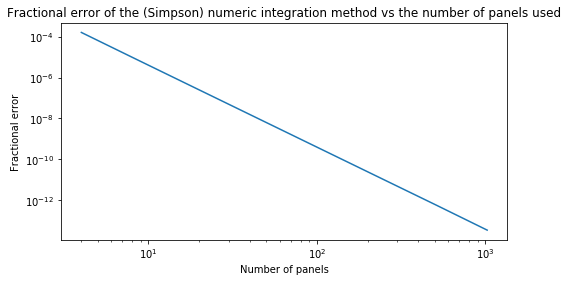

In [43]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution
results_numeric = []
fractional_errors = []
plt.figure(figsize=(8, 4))
plt.xlabel('Number of panels')
plt.ylabel('Fractional error')
plt.title('Fractional error of the (Simpson) numeric integration method vs the number of panels used')
for count in panel_counts:
    numericResult = integrate_numeric(x0, x1, count)
    fractionalError = 1 - numericResult / result_analytic
    results_numeric.append(numericResult)
    fractional_errors.append(fractionalError)  
plt.loglog(panel_counts, fractional_errors)

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

As the number of panels increases the error scales like $N^{-4}$, but if the number of panels becomes too large the the interval between panels becomes too small and numerical precision 'corrupts' the value of the integral

If the trapezium rule was being used, how would the panel
count affect accuracy? 

For the trapezium rule the error scales like $N^{-2}$, and hence the accuracy would be lower than Simpson's rule using the same number of panels. For example if the number of pannels were doubled, the trapezium rules error would decrease by a factor 4, however Simpson's rules error would decrease by a factor of 16.